In [115]:
#imports

import pandas as pd
from datetime import datetime as dt
import numpy as np
import random
import matplotlib.pyplot as plot

#Create a dataframe from the dataset
df = pd.read_csv('U.S. Presidents Birth and Death Information - Sheet1.csv')

In [116]:
#Convert the date columns to conventional datetypes for operational ease
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

In [117]:
#Update place of death for presidents who are alive and well for further calculations
update_death_place = df.select_dtypes(exclude=['datetime'])
df[update_death_place.columns] = update_death_place.fillna('Living')

In [119]:
update_death_date = df.select_dtypes(include=['datetime'])
df[update_death_date.columns] = update_death_date.fillna(dt.now())
#Clean up data to remove some informational content (which cannot be used for any operations)
df = df.drop(df.index[-1])

In [120]:
#Conversions

df['lived_days'] = (df['DEATH DATE'] - df['BIRTH DATE']) / np.timedelta64(1, 'D')
df['lived_months'] = (df['DEATH DATE'] - df['BIRTH DATE']) / np.timedelta64(1, 'M')
df['lived_years'] = (df['DEATH DATE'] - df['BIRTH DATE']) / np.timedelta64(1, 'Y')

In [121]:
#Creating individual dataframes for Presidents ranked 1 to 10 based on age in ascending and descending orders
ascending_df = df.sort_values(by=['lived_days']).head(10)
descending_df = df.sort_values(by=['lived_days'], ascending=False).head(10)

In [123]:
ascending_df['DEATH DATE'] = pd.to_datetime(ascending_df['DEATH DATE']).dt.date
descending_df['DEATH DATE'] = pd.to_datetime(descending_df['DEATH DATE']).dt.date

In [125]:
# Grabbing required columns for calculation of statistical distributions
lived_days_column = df["lived_days"]
lived_years_column = df["lived_years"].astype(int)
year_frequency = lived_years_column.value_counts()

In [126]:
# Assigning random weights in [0, 1] for calculating weighted averages
weights = []
for year in range(len(lived_years_column)):
    weights.append(random.random())
weights = np.array(weights)
# Calculating weighted values
weighted_values = weights * lived_days_column

# Calculating the required distributions
mean = lived_days_column.mean()
weighted_mean = weighted_values.sum() / weights.sum()
median = lived_days_column.median()
mode = lived_days_column.mode()[0] #grabbing the first value for the Mode
max = lived_days_column.max()
min = lived_days_column.min()
std_dev = lived_days_column.std()

In [127]:
# Creating a new dataframe for our statistical data
data = [['mean', mean], ['weighted_mean', weighted_mean], ['median', median], ['mode', mode], ['max', max], ['min', min], ['std_dev', std_dev]]
stats_dataframe = pd.DataFrame(data, columns = ['Statistic', 'Value(days)'])
stats_dataframe['Value(days)'] = stats_dataframe['Value(days)'].astype(float)

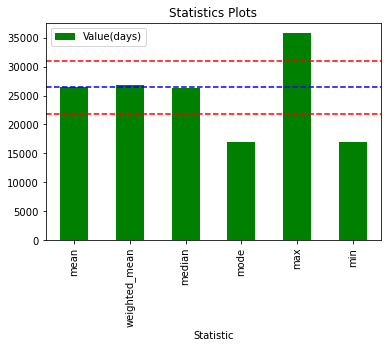

In [141]:
#dropping index 6 from the statistics table because plotting the standard deviation alongside other metrics is not meaningful
stats_dataframe.drop([6]).plot(kind = 'bar', x = 'Statistic', y = 'Value(days)', color = 'green')
plot.title('Statistics Plots')

#plotting standard deviation to show the spread of data on either sides of the mean
plot.axhline(y = mean + std_dev, color = 'red', linestyle = '--', label='Standard Deviation')
plot.axhline(y = mean, color = 'blue', linestyle = '--', label='Mean')
plot.axhline(y = mean - std_dev, color = 'red', linestyle = '--')
plot.show()

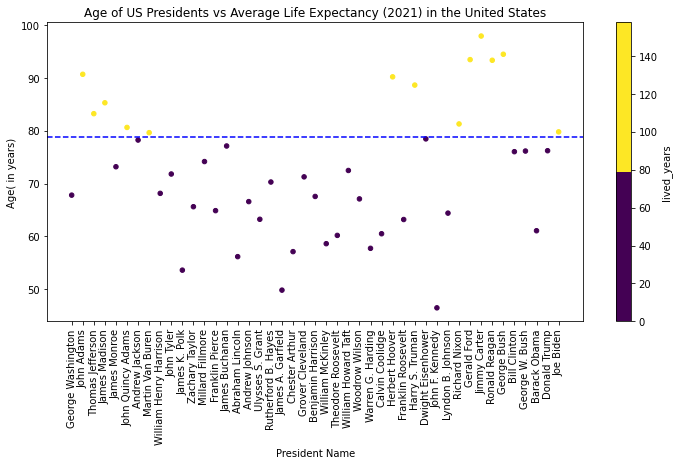

In [175]:
# Current Average life expectancy in the US is 78.79 years. 
cmap=plot.get_cmap('viridis', 2)
df.plot(kind = 'scatter', x='PRESIDENT', y='lived_years', c= 'lived_years', cmap=cmap, vmin = 0, vmax = 78.79*2, sharex = False)
plot.axhline(y = 78.79, color = 'blue', linestyle = '--', label='Mean')
plot.rcParams["figure.figsize"] = (12,5.5)
plot.ylabel("Age( in years)")
plot.xlabel("President Name")
plot.title("Age of US Presidents vs Average Life Expectancy (2021) in the United States")
plot.xticks(rotation=90)
plot.show()